<a href="https://colab.research.google.com/github/alvinnebula/DecisionTree_MapReduce/blob/main/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler, Normalizer, OneHotEncoder

In [2]:
!pip install  pyjanitor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.4/158.4 kB 3.5 MB/s eta 0:00:00


In [3]:
import janitor

In [4]:
from google.colab import drive
import os

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
drive.mount('/content/drive')
cur_path = "/content/drive/MyDrive/DS5460/finalproject"
os.chdir(cur_path)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [6]:
df = pd.read_csv("adult.csv").clean_names()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_categorical_dtype

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
df["marital_relation"] = df["marital_status"] + "_" + df["relationship"]
df = df.drop(["sex","race","education_num", "native_country", "marital_status","relationship"], axis = 1)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   workclass         32561 non-null  object
 2   fnlwgt            32561 non-null  int64 
 3   education         32561 non-null  object
 4   occupation        32561 non-null  object
 5   capital_gain      32561 non-null  int64 
 6   capital_loss      32561 non-null  int64 
 7   hours_per_week    32561 non-null  int64 
 8   income            32561 non-null  object
 9   marital_relation  32561 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.5+ MB


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
df["income"] = df["income"].replace(["<=50K",">50K"], [0,1])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
train, test = train_test_split(df, random_state = 200, train_size = 0.8, stratify = df["income"])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
train_0 = train[train["income"] == 0]
train_0 = train_0.drop_duplicates()
train_1 = train[train["income"] == 1]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
train_new = pd.concat([train_0, train_1], axis = 0)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
x_train, y_train = train_new.drop("income", axis = 1), train_new["income"]
x_test, y_test = test.drop("income", axis = 1), test["income"]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
num = []
cat = []
stri = []
columns = list(x_train.columns)
for col in columns:
    if is_numeric_dtype(x_train[col]):
        num.append(col)
    elif is_string_dtype(x_train[col]):
        stri.append(col)
    elif is_categorical_dtype(x_train[col]):
        cat.append(col)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
num, stri, cat

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week'],
 ['workclass', 'education', 'occupation', 'marital_relation'],
 [])

In [16]:
df["education"].unique()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [17]:
educ = ["education"]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
stri.remove("education")
num, stri, cat

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week'],
 ['workclass', 'occupation', 'marital_relation'],
 [])

In [19]:
min_max = MinMaxScaler()
ohe = OneHotEncoder()
ordi = OrdinalEncoder(categories = [["Preschool", "1st-4th","5th-6th", "7th-8th", "9th", "10th", 
                                            "11th", "12th", "HS-grad", "Some-college",
                                            "Assoc-voc","Assoc-acdm","Bachelors", "Masters","Prof-school","Doctorate"]])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
def column_transform(df, columns):
    new_df = df.copy()
    for col in columns:
        # num ~ [0,1]
        if col in num:
            ct = ColumnTransformer([("min_max", min_max, [col])])
            new_df[col + "_scaled"] = ct.fit_transform(df)
            continue
        # stri ~ {0,1}    
        elif col in stri:
            elements = sorted(df[col].unique())
            ct2 = ColumnTransformer([("ohe", ohe, [col])])
            if len(elements) > 2:
                x = ct2.fit_transform(df).toarray()
            elif len(elements) <= 2:
                x = np.array(ct2.fit_transform(df))
            for i in range(len(elements)):
                new_df[col + "_" + elements[i].lower()] = x[:,i]
        # depends on ord class
        elif col in educ:
            ct3 = ColumnTransformer([("ord", ordi, [col])])
            x = ct3.fit_transform(df)
            new_df[col + "_new"] = x
            continue
    new_df = new_df.drop(columns, axis = 1)
    return new_df

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
new_train_data = column_transform(x_train, list(x_train.columns))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
new_train_data["income"] = train_new["income"]

#new_train_data['education_new']
# 'age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week'

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
new_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26035 entries, 11761 to 21399
Data columns (total 60 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   age_scaled                                             26035 non-null  float64
 1   workclass_?                                            26035 non-null  float64
 2   workclass_federal-gov                                  26035 non-null  float64
 3   workclass_local-gov                                    26035 non-null  float64
 4   workclass_never-worked                                 26035 non-null  float64
 5   workclass_private                                      26035 non-null  float64
 6   workclass_self-emp-inc                                 26035 non-null  float64
 7   workclass_self-emp-not-inc                             26035 non-null  float64
 8   workclass_state-gov                       

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
def column_fit_transform(train, other, columns):
    new_df = other.copy()
    for col in columns:
        # minmax
        if col in num:
            ct = ColumnTransformer([("min_max", min_max, [col])])
            ct.fit(train)
            new_df[col + "_scaled"] = ct.transform(other)
        # ohe
        elif col in stri:
            elements = sorted(other[col].unique())
            ct2 = ColumnTransformer([("ohe", ohe, [col])])
            if len(elements) > 2:
                ct2.fit(train)
                x = ct2.transform(other).toarray()
            elif len(elements) <= 2:
                ct2.fit(train)
                x = np.array(ct2.transform(other))
            for i in range(len(elements)):
                new_df[col + "_" + elements[i].lower()] = x[:,i]
        # ord
        elif col in educ:
            ct3 = ColumnTransformer([("ord", ordi, [col])])
            ct3.fit(train)
            x = ct3.transform(other)
            new_df[col + "_new"] = x
        
    new_df = new_df.drop(columns, axis = 1)
    return new_df

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
new_test_data = column_fit_transform(x_train, x_test, x_train.columns)
test_col, train_col = list(new_test_data.columns), list(new_train_data.columns)
missing = list(set(train_col).difference(set(test_col)))
for miss in missing:
    new_test_data[missing] = 0.0
new_test_data = new_test_data.drop("income", axis = 1)
new_test_data.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age_scaled,workclass_?,workclass_federal-gov,workclass_local-gov,workclass_never-worked,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,workclass_state-gov,workclass_without-pay,...,marital_relation_separated_not-in-family,marital_relation_separated_other-relative,marital_relation_separated_own-child,marital_relation_separated_unmarried,marital_relation_widowed_not-in-family,marital_relation_widowed_other-relative,marital_relation_widowed_own-child,marital_relation_widowed_unmarried,marital_relation_married-af-spouse_other-relative,marital_relation_married-af-spouse_own-child
24169,0.205479,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22386,0.383562,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31288,0.136986,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6245,0.630137,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4654,0.315068,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
len(new_test_data)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6513

In [29]:
missing

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['marital_relation_married-af-spouse_other-relative',
 'income',
 'marital_relation_married-af-spouse_own-child']

In [25]:
def getEntropy(counts):
    percentages = counts/np.sum(counts)

    entr = 0
    for per in percentages:
        if per == 0:
            continue
        entr = entr - (per*np.log2(per))
    return entr

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
def dataEntropy(data):
    
    high_income = data[data['income'] == 1].shape[0]
    low_income = data[data['income'] == 0].shape[0]
    
    result = getEntropy([low_income,high_income])
    return result

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
def dataGivenEntropy(dataX, dataY):
    entrX = dataEntropy(dataX)
    entrY = dataEntropy(dataY)
    nX = dataX.shape[0]
    nY = dataY.shape[0]
    n = nX + nY
    result = nX/n * entrX + nY/n * entrY
    return result

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
def infoGain(data, dataX, dataY):
    result = dataEntropy(data) - dataGivenEntropy(dataX, dataY)
    return result

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
def getGini(counts):
    percentages = counts/np.sum(counts)
    gini = 1-np.sum(percentages**2)
    return gini

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
len(new_train_data["age_scaled"].unique())

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


72

In [31]:
def findBestSplit(data, label):
    minEntropy = 1
    colSelected = str()
    thresh_value = 0
    dataX_found,dataY_found = None, None
    for col in list(data.columns):
      if col != label:
        # make the split 

        if len(data[col].unique()) > 2:
          max = data[col].max()
          threshold = np.linspace(0,max,30)[1:-1]
          infoGainList = []

          # for 28 different thresholds, calculate the info-gain
          for i in range(len(threshold)):
            dataX = data[data[col] > threshold[i]]
            dataY = data[data[col] <= threshold[i]]
            infoGainList.append(infoGain(data, dataX, dataY))

          # get the max info-gain
          idx = np.argmax(infoGainList)
          dataX = data[data[col] > threshold[idx]]
          dataY = data[data[col] <= threshold[idx]]
          thresh = threshold[idx]

        else:
          thresh = 0.5
          dataX = data[data[col] > thresh]
          dataY = data[data[col] <= thresh]
            
          
        entr = dataGivenEntropy(dataX, dataY)
        
        
        if entr < minEntropy:
            minEntropy = entr
            colSelected = col
            dataX_found = dataX
            dataY_found = dataY
            thresh_value = thresh
        

    return colSelected, minEntropy, dataX_found, dataY_found, thresh_value

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
cols = []

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
findBestSplit(new_train_data, 'income')[0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'marital_relation_married-civ-spouse_husband'

In [34]:
cols.append(findBestSplit(new_train_data, 'income')[0])
cols.append("income")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
cols

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['marital_relation_married-civ-spouse_husband', 'income']

In [36]:
len(findBestSplit(new_train_data, 'income')[2][cols]['marital_relation_married-civ-spouse_husband'].unique())

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1

In [102]:
class Branch:
    no=0
    depth=1
    column=''
    entropy=0
    value = []
    samples = 0
    gini = 0
    thresh = 0
    branch_positive=None
    branch_negative=None
    positive=0
    negative=0
    num_cols = 0
    col_names = []

In [92]:
number = 0 
def decisionTreeInner(data, label, depth, max_depth, max_features, min_samples_split, min_samples_leaf):
    global number
    branch = Branch()
    branch.no = number
    number += 1
    branch.depth = depth
    branch.num_depth = 1
    
    branch.samples = data.shape[0]
    positive = data[data[label]==1].shape[0]
    negative = data[data[label]==0].shape[0]
    
    branch.value= [negative, positive]
    branch.entropy = getEntropy(branch.value)
    branch.gini = getGini(branch.value)
    
    bestSplit = findBestSplit(data, label)
    
    branch.column = bestSplit[0]
    branch.col_names.append(branch.column)
    cols = list(set(branch.col_names))
    branch.num_cols = len(cols)
    
    newEntropy = bestSplit[1]
    dataNegative = bestSplit[2]
    dataPositive = bestSplit[3]
    branch.thresh = bestSplit[4]

    unbalanced_0 = branch.value[0]/(branch.value[0] + branch.value[1]) 
    unbalanced_1 = branch.value[1]/(branch.value[0] + branch.value[1])
    
    if len(cols) < max_features:
        if depth == max_depth or branch.column == "" or branch.samples <= min_samples_split or (len(dataNegative) <= min_samples_leaf and len(dataPositive) <= min_samples_leaf) or (unbalanced_0 > 0.95 and branch.samples <= 1000) or (unbalanced_1 > 0.95 and branch.samples <= 1000):
          
            branch.positive = number
            number +=1
            branch.negative = number
            number +=1   
            branch.column = ""
    
            return branch
        
        # next step
        else:
            
            #dataNegative = bestSplit[2]
            branch.branch_negative = decisionTreeInner(dataNegative, label, depth+1, max_depth=max_depth, max_features = max_features, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
            
            #dataPositive = bestSplit[3]
            branch.branch_positive = decisionTreeInner(dataPositive, label, depth+1, max_depth=max_depth, max_features = max_features, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

            return branch
    else:
        
        if depth == max_depth or branch.column == "" or branch.samples <= min_samples_split or (len(dataNegative) <= min_samples_leaf and len(dataPositive) <= min_samples_leaf) or (unbalanced_0 > 0.95 and branch.samples <= 1000) or (unbalanced_1 > 0.95 and branch.samples <= 1000):
            
            branch.positive = number
            number +=1
            branch.negative = number
            number +=1   
            branch.column = ""
            
            return branch
        
        else:
            if "" in cols:
              cols.remove("")
            cols.append("income")
            
            #dataNegative = bestSplit[2]
            dataNegative = dataNegative[cols]
            
            branch.branch_negative = decisionTreeInner(dataNegative, label, depth+1, max_depth=max_depth, max_features = max_features, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
            
            #dataPositive = bestSplit[3]
            dataPositive= dataPositive[cols]
            
            branch.branch_positive = decisionTreeInner(dataPositive, label, depth+1, max_depth=max_depth, max_features = max_features, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
            cols.remove("income")
            return branch


In [93]:
def decision_tree(data, label, max_depth, max_features, min_samples_split, min_samples_leaf):
    number = 0
    entropy = dataEntropy(data)
    columns = []
    tree = decisionTreeInner(data, label, 0, max_depth = max_depth, max_features = max_features, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
    return tree

In [94]:
import warnings
warnings.filterwarnings('ignore')
import time
start=time.time()
my_dt = decision_tree(new_train_data, 'income', max_depth=5, max_features = 10, min_samples_split = 400, min_samples_leaf = 250)
print(round(time.time()-start, 2), 'seconds')

21.52 seconds


In [95]:
my_dt.samples

26035

In [96]:
my_dt

In [97]:
def get_dot_data_innner(branch:Branch, classes, dot_data):
    if branch.value[0]<branch.value[1]:
        the_class=classes[0]
    else:
        the_class=classes[1]
    if branch.branch_positive:
        dot_data=dot_data+'{} [label=<{} le {:.2f}<br/>entropy = {:.3f}<br/>samples = {}<br/>value = {}<br/>class = {}> , fillcolor="#FFFFFFFF"] ;\r\n'.format(
            branch.no, branch.column, branch.thresh, branch.entropy, branch.samples, branch.value, the_class)
    else:
        dot_data=dot_data+'{} [label=<entropy = {:.3f}<br/>samples = {}<br/>value = {}<br/>class = {}> , fillcolor="#FFFFFFFF"] ;\r\n'.format(
            branch.no, branch.entropy, branch.samples, branch.value, the_class)
    if branch.branch_negative:
        dot_data=dot_data+'{} -> {} [labeldistance=2.5, labelangle=45, headlabel="no"]; \r\n'.format(branch.no, branch.branch_negative.no)
        dot_data=get_dot_data_innner(branch.branch_negative, classes, dot_data)
        
    if branch.branch_positive:
        dot_data=dot_data+'{} -> {} [labeldistance=1.5, labelangle=45, headlabel="yes"]; \r\n'.format(branch.no, branch.branch_positive.no)
        dot_data=get_dot_data_innner(branch.branch_positive, classes, dot_data)
  

    return dot_data
    
def get_dot_data(branch:Branch, classes=['above 50K','below 50K']):
    dot_data="""
digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
"""
    dot_data=get_dot_data_innner(branch, classes,  dot_data)
    dot_data=dot_data+'\r\n}'
    return dot_data

In [103]:
dot_data=get_dot_data(my_dt)

In [104]:
import graphviz 

In [105]:
graph = graphviz.Source(dot_data) 
#graph.render('./data/my_dt', format='png')


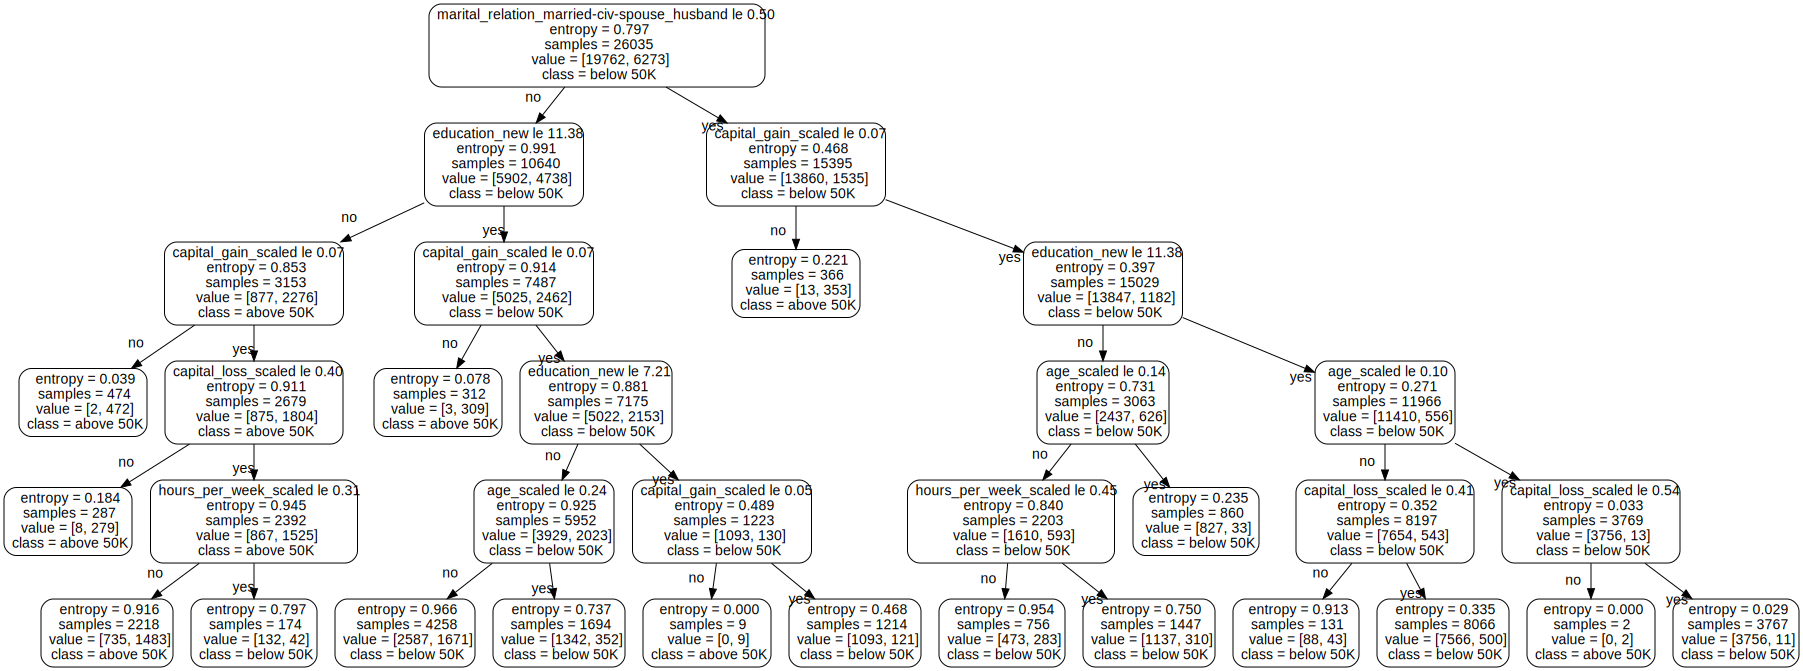

In [106]:
graph

### Evaluating on Test data

In [107]:
new_train_data["income"].value_counts()

0    19762
1     6273
Name: income, dtype: int64

In [108]:
my_dt.samples

26035

In [109]:
start=time.time()
my_dt = decision_tree(new_train_data, 'income', max_depth=13, max_features = 19, min_samples_split = 300, min_samples_leaf = 150)
print(round(time.time()-start, 2), 'seconds')

125.59 seconds


In [182]:
def tree_predict(my_dt, obs):
  out_dt = my_dt
  income = ""
  while out_dt.column != "":
    if obs[out_dt.column] <= out_dt.thresh:
      out_dt = out_dt.branch_positive
    else:
      out_dt = out_dt.branch_negative
  
  if out_dt.value[1]/(out_dt.value[1] + out_dt.value[0]) >= 0.305:
    income = 1
  else:
    income = 0
  
  return out_dt, income

In [183]:
len(new_test_data)

6513

In [184]:
new_test_data_use = new_test_data.reset_index(drop = True)

In [185]:
incomes = []
out_vals = []
for i in range(len(new_test_data_use)):
  out_dt, income = tree_predict(my_dt, new_test_data_use.iloc[i,:])
  incomes.append(income)
  out_vals.append(out_dt.value)

In [186]:
from collections import Counter
Counter(incomes)

Counter({0: 5528, 1: 985})

In [187]:
out_vals[:10]

[[1278, 80],
 [87, 1],
 [938, 14],
 [95, 89],
 [938, 14],
 [1734, 96],
 [2004, 0],
 [1278, 80],
 [593, 0],
 [938, 14]]

In [188]:
out_dt, income = tree_predict(my_dt, new_test_data.iloc[1000,:])

In [189]:
out_dt.value

[827, 33]

In [190]:
income

0

In [191]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [192]:
print(classification_report(y_test, incomes))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4945
           1       0.70      0.44      0.54      1568

    accuracy                           0.82      6513
   macro avg       0.77      0.69      0.71      6513
weighted avg       0.81      0.82      0.80      6513



In [193]:
conf = confusion_matrix(y_test,incomes)

<Axes: >

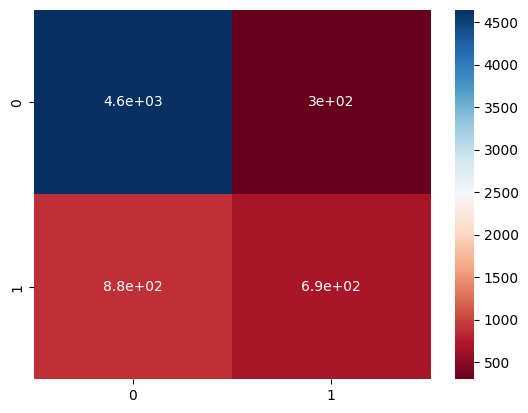

In [194]:
sns.heatmap(conf, annot = True, cmap = "RdBu")

### Column Gathering

In [85]:
from collections import Counter
col_dict = dict(Counter(my_dt.col_names))

In [86]:
col_df = pd.DataFrame({"variable": list(col_dict.keys()), "frequency": list(col_dict.values())})

In [87]:
col_df = col_df[col_df["variable"] != ""]

In [88]:
col_df

,variable,frequency
0,marital_relation_married-civ-spouse_husband,3
1,education_new,19
2,capital_gain_scaled,39
3,workclass_self-emp-not-inc,12
4,capital_loss_scaled,34
5,workclass_?,5
6,hours_per_week_scaled,20
7,occupation_exec-managerial,13
8,fnlwgt_scaled,32
9,age_scaled,10
